In [344]:
#Import Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [345]:
df = pd.read_csv('News_Final.csv')

In [346]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
IDLink               93239 non-null float64
Title                93239 non-null object
Headline             93224 non-null object
Source               92960 non-null object
Topic                93239 non-null object
PublishDate          93239 non-null object
SentimentTitle       93239 non-null float64
SentimentHeadline    93239 non-null float64
Facebook             93239 non-null int64
GooglePlus           93239 non-null int64
LinkedIn             93239 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


#### EDA

In [348]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline              15
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [349]:
df['Source'].value_counts()

Bloomberg                                      1732
Reuters                                        1321
ABC News                                       1098
New York Times                                  992
The Guardian                                    933
Business Insider                                884
Economic Times                                  787
Forbes                                          781
Washington Post                                 774
CNN                                             742
Wall Street Journal                             730
WinBeta                                         707
CNBC                                            682
Huffington Post                                 676
Breitbart News                                  605
Reuters via Yahoo! Finance                      551
The Hill                                        548
Financial Times                                 544
USA TODAY                                       530
ZDNet       

#### Drop the rows containing Obama and Economy as per objective we need only Microsoft and Palestine 

In [350]:
df = df.drop(df[df.Topic == 'obama'].index)

In [351]:
df = df.drop(df[df.Topic == 'economy'].index)

In [352]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
5,27790.0,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
6,80690.0,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",NaN,palestine,2016-02-28 14:03:00,0.000000,-0.005906,0,0,0
8,80771.0,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1
9,27803.0,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1
10,27813.0,Microsoft Project Centennial seen with “univer...,"Microsoft may have burned off one bridge, but ...",SlashGear,microsoft,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1


In [353]:
df.isnull().sum()

IDLink                 0
Title                  0
Headline               4
Source               239
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

#### Fill the Null values 

In [354]:
df.Source.fillna(df.Source.mode()[0],inplace = True) #Replace the null values of the Source with the mode 

In [355]:
df.isnull().sum()

IDLink               0
Title                0
Headline             4
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [356]:
df.dropna(axis=0,inplace=True)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30697 entries, 5 to 93238
Data columns (total 11 columns):
IDLink               30697 non-null float64
Title                30697 non-null object
Headline             30697 non-null object
Source               30697 non-null object
Topic                30697 non-null object
PublishDate          30697 non-null object
SentimentTitle       30697 non-null float64
SentimentHeadline    30697 non-null float64
Facebook             30697 non-null int64
GooglePlus           30697 non-null int64
LinkedIn             30697 non-null int64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


In [358]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IDLink,30697.0,45491.104831,28776.234078,101.000000,20623.000000,44461.000000,66310.000000,104800.000000
SentimentTitle,30697.0,-0.004101,0.124857,-0.950694,-0.068041,0.000000,0.061688,0.714610
SentimentHeadline,30697.0,-0.023314,0.136817,-0.732337,-0.108333,-0.024116,0.060697,0.964646
Facebook,30697.0,36.072906,307.763498,-1.000000,0.000000,2.000000,14.000000,22346.000000
GooglePlus,30697.0,3.714728,20.283135,-1.000000,0.000000,0.000000,2.000000,1016.000000
LinkedIn,30697.0,24.653810,246.613707,-1.000000,0.000000,0.000000,5.000000,20341.000000


In [359]:
df['Topic'].value_counts()

microsoft    21857
palestine     8840
Name: Topic, dtype: int64

In [360]:
max_sen_title = df.groupby(['Title','SentimentTitle'], as_index=False).max()  

In [361]:
max_sen_title

,Title,SentimentTitle,IDLink,Headline,Source,Topic,PublishDate,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,!8-year-old Palestine woman killed in wreck on...,-0.014657,98543.0,DPS Trooper Jean Dark confirmed that a two-veh...,KXXV News Channel 25,palestine,2016-05-27 00:05:35,-0.179148,1,0,0
1,!8-year-old Palestine woman killed in wreck on...,-0.033501,98546.0,An 18-year-old Palestine woman was killed in a...,KLTV 7 Tyler,palestine,2016-05-26 16:14:00,-0.121528,0,0,0
2,#14. Palestine,0.000000,102518.0,"In 2014, Palestine received a total of $497,26...",Winona Daily News,palestine,2016-06-17 04:31:48,0.016549,0,0,0
3,#4. Palestine,0.000000,100025.0,Palestine. Updated 18 hrs ago; 0 &middot; Pale...,Mason City Globe Gazette,palestine,2016-06-04 01:55:36,0.129046,0,0,0
4,#GivingTuesday Founder 92Y and Founding Partne...,-0.047246,5733.0,"92nd Street Y (92Y), the nonprofit cultural an...",Stockhouse,microsoft,2015-11-30 20:20:18,0.057354,1,0,0
5,#GivingTuesday Founder 92Y and Founding Partne...,-0.064550,5709.0,"92nd Street Y, the nonprofit cultural and comm...",GlobeNewswire via Yahoo! Finance,microsoft,2015-11-30 11:53:00,0.021554,0,0,30
6,#Microsoft Corporation's Senior Director of Gl...,-0.028646,59492.0,With over 15 years of corporate security exper...,InvestorIdeas.com (press release),microsoft,2016-06-27 14:40:12,-0.119338,-1,0,43
7,#Nakba Marked on Twitter on its 68th Anniversary,0.088388,98358.0,Palestinians all over the world mark May 15 as...,The,palestine,2016-05-16 06:17:00,0.178221,-1,-1,-1
8,#PulseList 2015: Microsoft Bing's top searches...,0.000000,11875.0,Just as Facebook and Google have both released...,Pulse Nigeria,microsoft,2015-12-26 07:10:26,-0.150967,7,1,0
9,#Sphere 3D's (NASDAQ: $ANY) Collaboration with...,0.000000,15768.0,#Sphere 3D's (NASDAQ: $ANY) Collaboration with...,InvestorIdeas.com (press release),microsoft,2016-01-11 17:00:26,-0.117851,0,0,0


In [362]:
ndf=df[(df.Topic=='microsoft')&(df.Facebook>0)&(df.GooglePlus>0)&(df.LinkedIn>0) ]

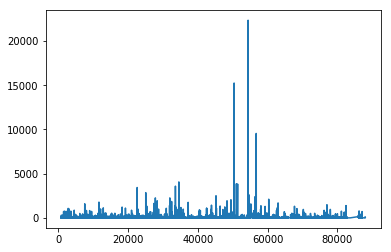

In [363]:
ndf.Facebook.plot()
plt.show()

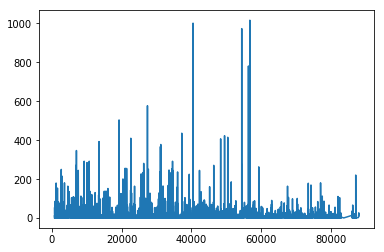

In [364]:
ndf.GooglePlus.plot()
plt.show()

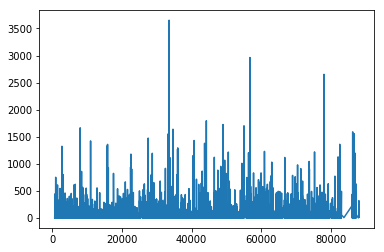

In [365]:
ndf.LinkedIn.plot()
plt.show()

In [366]:
mdf=df[(df.Topic=='palestine')&(df.Facebook>0)&(df.GooglePlus>0)&(df.LinkedIn>0) ]

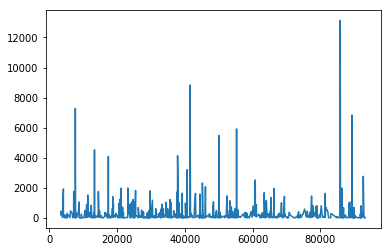

In [367]:
mdf.Facebook.plot()
plt.show()

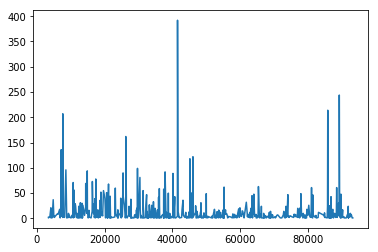

In [368]:
mdf.GooglePlus.plot()
plt.show()

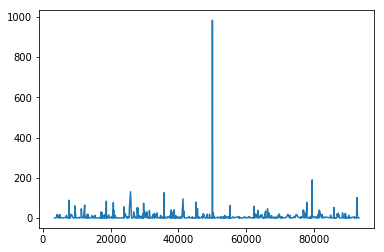

In [369]:
mdf.LinkedIn.plot()

(array([7.067e+03, 1.300e+01, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 2.23550e+03, 4.47000e+03, 6.70450e+03, 8.93900e+03,
        1.11735e+04, 1.34080e+04, 1.56425e+04, 1.78770e+04, 2.01115e+04,
        2.23460e+04]),
 <a list of 10 Patch objects>)

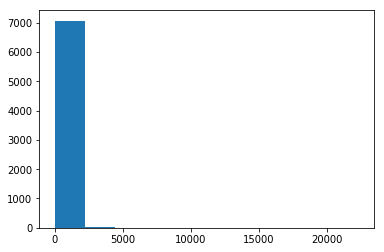

In [370]:
import matplotlib.pyplot as plt
plt.hist(ndf.Facebook, bins=10)

(array([6.973e+03, 6.700e+01, 2.800e+01, 4.000e+00, 7.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00]),
 array([1.000e+00, 1.025e+02, 2.040e+02, 3.055e+02, 4.070e+02, 5.085e+02,
        6.100e+02, 7.115e+02, 8.130e+02, 9.145e+02, 1.016e+03]),
 <a list of 10 Patch objects>)

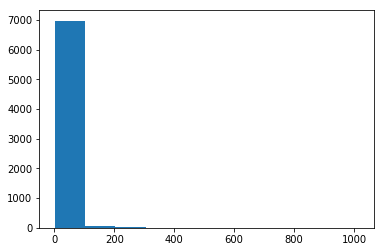

In [371]:

plt.hist(ndf.GooglePlus, bins=10)

(array([6.821e+03, 1.820e+02, 4.400e+01, 2.300e+01, 9.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([1.0000e+00, 3.6610e+02, 7.3120e+02, 1.0963e+03, 1.4614e+03,
        1.8265e+03, 2.1916e+03, 2.5567e+03, 2.9218e+03, 3.2869e+03,
        3.6520e+03]),
 <a list of 10 Patch objects>)

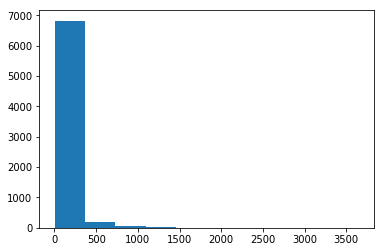

In [372]:

plt.hist(ndf.LinkedIn, bins=10)

(array([731.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,  99.2, 197.4, 295.6, 393.8, 492. , 590.2, 688.4, 786.6,
        884.8, 983. ]),
 <a list of 10 Patch objects>)

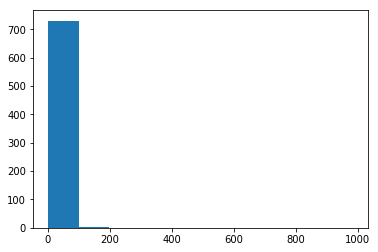

In [373]:

plt.hist(mdf.LinkedIn, bins=10)

(array([698.,  26.,   3.,   3.,   2.,   2.,   1.,   0.,   0.,   1.]),
 array([1.00000e+00, 1.31550e+03, 2.63000e+03, 3.94450e+03, 5.25900e+03,
        6.57350e+03, 7.88800e+03, 9.20250e+03, 1.05170e+04, 1.18315e+04,
        1.31460e+04]),
 <a list of 10 Patch objects>)

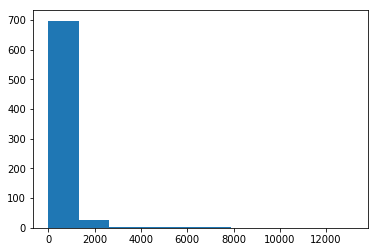

In [374]:

plt.hist(mdf.Facebook, bins=10)

(array([681.,  40.,   8.,   2.,   1.,   2.,   1.,   0.,   0.,   1.]),
 array([  1. ,  40.1,  79.2, 118.3, 157.4, 196.5, 235.6, 274.7, 313.8,
        352.9, 392. ]),
 <a list of 10 Patch objects>)

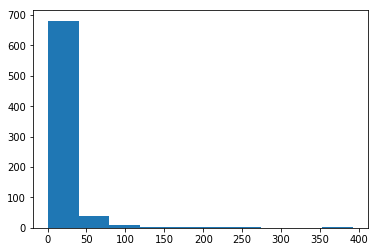

In [375]:

plt.hist(mdf.GooglePlus, bins=10)

#### High to Low SentimentTitle score based on Source

In [376]:
df[['Source','SentimentTitle']].groupby('Source').agg('median').sort_values(by='SentimentTitle',ascending=False).head()

,SentimentTitle
Source,
Yahoo Tech via Yahoo! News,0.714610
Focus News,0.500000
ChinaTopix,0.474342
Mensquare,0.395292
4k,0.376889


In [377]:
df[['Topic','SentimentTitle','SentimentHeadline']].groupby('Topic').agg('mean').sort_values(by='SentimentTitle',ascending=False)

,SentimentTitle,SentimentHeadline
Topic,,
microsoft,0.002363,-0.014745
palestine,-0.020081,-0.044500


#### Convert Published Date to Datetime

In [378]:
df['Date'] = pd.to_datetime(df['PublishDate'])

In [379]:
df['Date'].min(),df['Date'].max()

(Timestamp('2015-03-01 00:19:00'), Timestamp('2016-07-07 16:16:11'))

In [380]:
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year
df['month_name'] = df['Date'].dt.strftime('%b')
df['weekday'] = df['Date'].dt.strftime('%A')

#### Monday is having the Highest number of News Published

In [381]:
df.weekday.value_counts()

Monday       5671
Tuesday      5638
Wednesday    5421
Thursday     5126
Friday       4287
Sunday       2320
Saturday     2234
Name: weekday, dtype: int64

#### March is having the Highest number of News Published, while it is coming 2 times in 2015 and 2016. 

In [382]:
df.month_name.value_counts()

Mar    4282
Jan    4210
Dec    3857
May    3678
Jun    3639
Apr    3597
Feb    3510
Nov    3021
Jul     680
Oct     219
Sep       3
Aug       1
Name: month_name, dtype: int64

#### News published based on Month and Topic 

In [383]:
df[['month_name','Topic','IDLink']].groupby(['month_name','Topic']).agg('count').sort_values(by='IDLink',ascending=False)

,,IDLink
month_name,Topic,
Mar,microsoft,3027
Jan,microsoft,2864
May,microsoft,2719
Jun,microsoft,2703
Dec,microsoft,2664
Apr,microsoft,2609
Feb,microsoft,2396
Nov,microsoft,2259
Jan,palestine,1346


In [384]:
df['GooglePlus'].value_counts().head()

 0    15924
 1     3590
-1     2690
 2     1980
 3     1257
Name: GooglePlus, dtype: int64

In [385]:
df['LinkedIn'].value_counts().head()

 0    15356
-1     2690
 1     2295
 2     1140
 3      778
Name: LinkedIn, dtype: int64

In [386]:
df['Facebook'].value_counts().head()

 0    6388
-1    5037
 1    2260
 2    1667
 3    1330
Name: Facebook, dtype: int64

In [387]:
df.PublishDate = df.PublishDate.astype('datetime64[ns]')

In [388]:
df.dtypes

IDLink                      float64
Title                        object
Headline                     object
Source                       object
Topic                        object
PublishDate          datetime64[ns]
SentimentTitle              float64
SentimentHeadline           float64
Facebook                      int64
GooglePlus                    int64
LinkedIn                      int64
Date                 datetime64[ns]
month                         int64
day                           int64
year                          int64
month_name                   object
weekday                      object
dtype: object

In [389]:
x=df.iloc[:,[6,7]]
y=df.Facebook

In [390]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [391]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [392]:
lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)
lrmodel.score(x_test,y_test)


-0.00015967209599554444

#### Making of wordCloud from Title

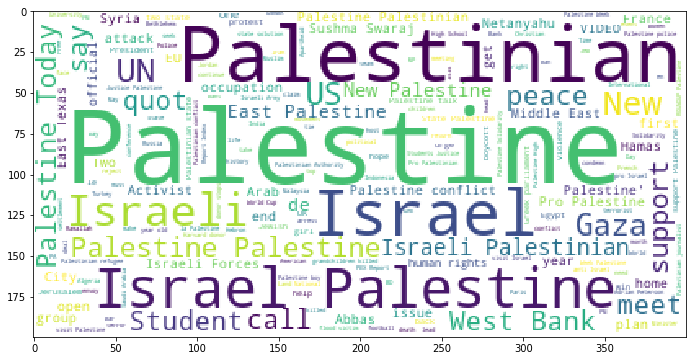

In [393]:
import nltk
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')
stopwords
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='palestine'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

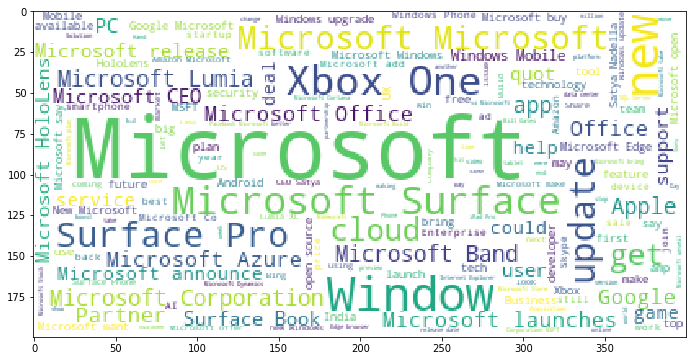

In [394]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='microsoft'])
wc = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

In [395]:
df.dtypes

IDLink                      float64
Title                        object
Headline                     object
Source                       object
Topic                        object
PublishDate          datetime64[ns]
SentimentTitle              float64
SentimentHeadline           float64
Facebook                      int64
GooglePlus                    int64
LinkedIn                      int64
Date                 datetime64[ns]
month                         int64
day                           int64
year                          int64
month_name                   object
weekday                      object
dtype: object

In [396]:
df.Headline = df.Headline.apply(str)

In [397]:
docs = df['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
#stopwords.extend(['amp','rt'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

5      attende expect see latest version microsoft d...
6     ramallah februari   wafa  palestin liber organ...
8     hancock counti man lost barn earli monday morn...
9     new delhi feb  technolog giant microsoft targe...
10    microsoft may burn one bridg still build diffe...
Name: Headline, dtype: object

In [398]:
df.dtypes

IDLink                      float64
Title                        object
Headline                     object
Source                       object
Topic                        object
PublishDate          datetime64[ns]
SentimentTitle              float64
SentimentHeadline           float64
Facebook                      int64
GooglePlus                    int64
LinkedIn                      int64
Date                 datetime64[ns]
month                         int64
day                           int64
year                          int64
month_name                   object
weekday                      object
dtype: object

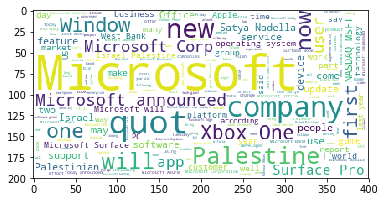

In [399]:
text = ' '.join(df['Headline'])
wc = WordCloud(background_color='white').generate(text)
plt.imshow(wc)

In [401]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [431]:
ndf1=df[df['Topic']=='microsoft']
docs = ndf1['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt','microsoft','new','today','busi','use','said','year','one','week','microsofts'])
#stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [lemmatizer.lemmatize(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

5      attendee expected see latest version dynamic ...
9     delhi feb  technology giant targeted rival app...
10    may burned bridge still building different per...
11    platform battle back mwc analysis two parallel...
14    ar headset made available developer along thre...
Name: Headline, dtype: object

In [432]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=4, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)


In [433]:
nrows = dtm.shape[0]
ncols = dtm.shape[1]
total_values = nrows * ncols
sparsity = (total_values - dtm.size)/total_values*100
sparsity

99.81330420217844

In [434]:
df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())


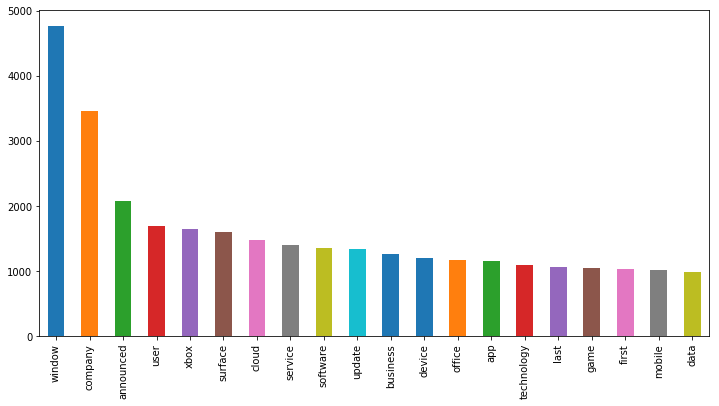

In [435]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,6))
plt.show()

In [436]:
wdf=pd.DataFrame(df_dtm.sum().sort_values(ascending=False).head(20).reset_index())
wdf.columns=['Words','Count']


In [437]:
import seaborn as sns

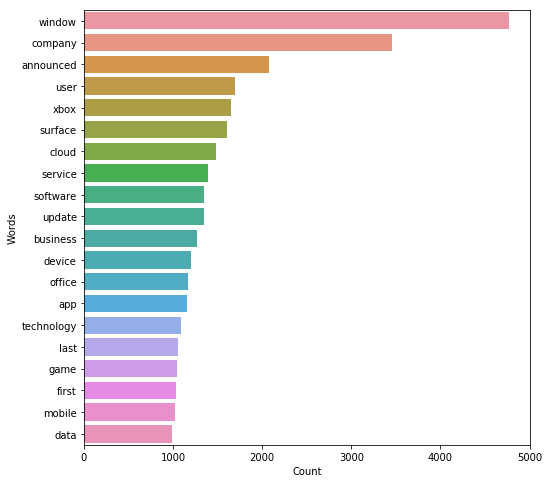

In [438]:
plt.figure(figsize=(8,8))
sns.barplot(x=wdf.Count,y=wdf.Words)
plt.show()

In [439]:
ndf2=df[df['Topic']=='microsoft']
docs =ndf2['Title'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt','microsoft','new','today','busi','use','said','year','one','week','microsofts'])
#stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [lemmatizer.lemmatize(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=4, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)


nrows = dtm.shape[0]
ncols = dtm.shape[1]
total_values = nrows * ncols
sparsity = (total_values - dtm.size)/total_values*100
sparsity

df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())

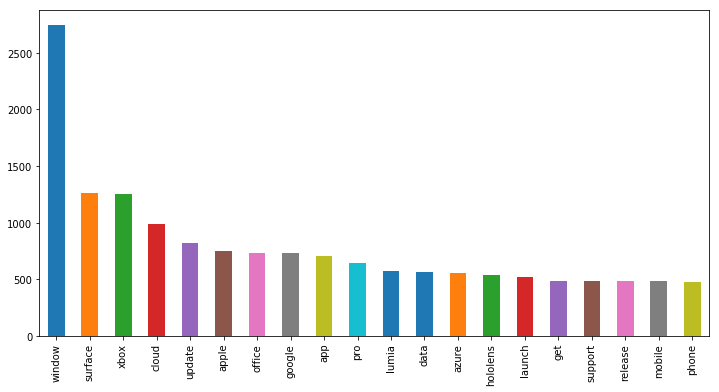

In [440]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,6))

In [441]:
wdf=pd.DataFrame(df_dtm.sum().sort_values(ascending=False).head(20).reset_index())
wdf.columns=['Words','Count']
wdf

,Words,Count
0,window,2742
1,surface,1263
2,xbox,1250
3,cloud,990
4,update,820
5,apple,746
6,office,736
7,google,730
8,app,703
9,pro,640


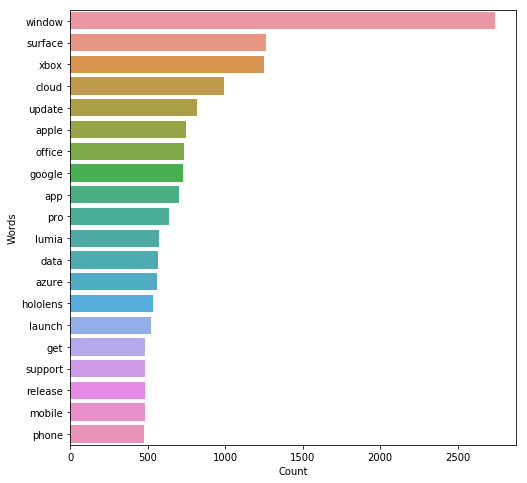

In [442]:
plt.figure(figsize=(8,8))
sns.barplot(x=wdf.Count,y=wdf.Words)
plt.show()

In [472]:
ndf2=df[df['Topic']=='palestine']
docs =ndf2['Headline'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt','palestine','palestinian','isra','intern','one','said','israeli','new','year','de','two','first'])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [lemmatizer.lemmatize(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

6      ramallah february   wafa  liberation organizat...
8      hancock county man lost barn early monday morn...
56     ramallah february   wafa  government japan con...
111    ramallah february   wafa  government japan con...
140    forced eviction farmer land jordan valley hebr...
Name: Headline, dtype: object

In [473]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=4, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)


In [474]:
nrows = dtm.shape[0]
ncols = dtm.shape[1]
total_values = nrows * ncols
sparsity = (total_values - dtm.size)/total_values*100
sparsity

99.74080954449205

In [475]:
df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())


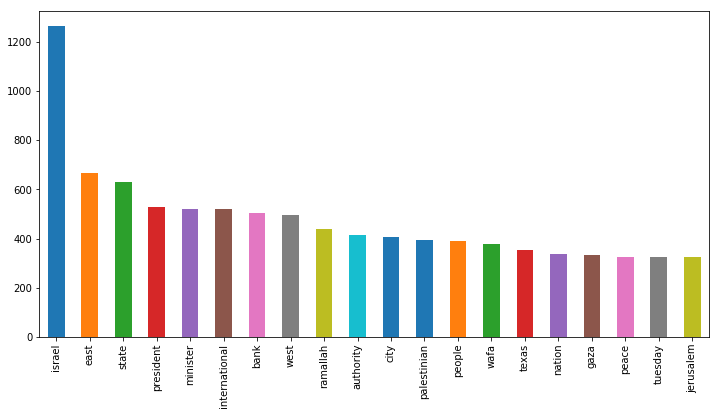

In [476]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,6))

In [477]:
wdf=pd.DataFrame(df_dtm.sum().sort_values(ascending=False).head(20).reset_index())
wdf.columns=['Words','Count']


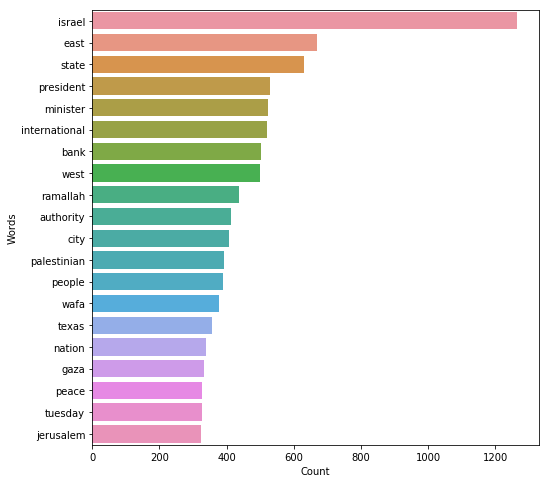

In [478]:
plt.figure(figsize=(8,8))
sns.barplot(x=wdf.Count,y=wdf.Words)
plt.show()

In [479]:
ndf2=df[df['Topic']=='palestine']
docs =ndf2['Title'].str.lower().str.replace('[^a-z@# ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['amp','rt','palestine','palestinian','isra','intern','one','said','israeli','new','year','de','two','first'])
#stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [lemmatizer.lemmatize(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=4, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)


nrows = dtm.shape[0]
ncols = dtm.shape[1]
total_values = nrows * ncols
sparsity = (total_values - dtm.size)/total_values*100
sparsity

df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())

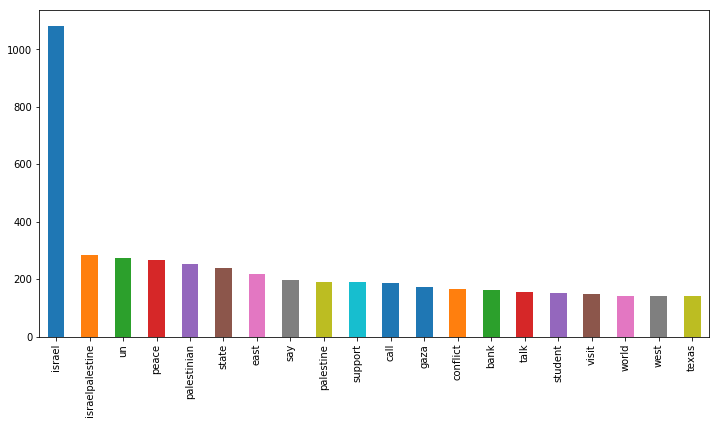

In [480]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,6))

In [481]:
wdf=pd.DataFrame(df_dtm.sum().sort_values(ascending=False).head(20).reset_index())
wdf.columns=['Words','Count']
wdf

,Words,Count
0,israel,1081
1,israelpalestine,284
2,un,273
3,peace,265
4,palestinian,251
5,state,239
6,east,218
7,say,197
8,palestine,191
9,support,190


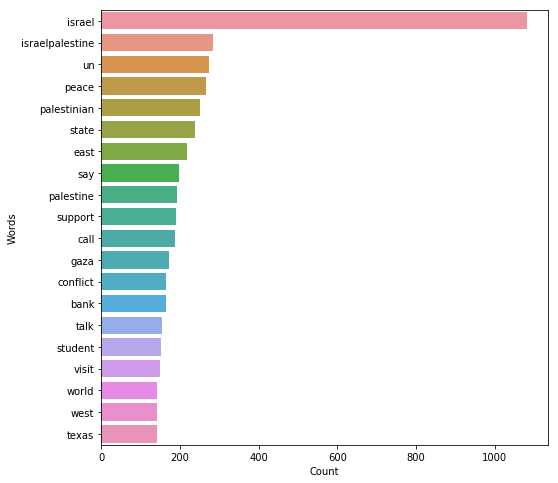

In [482]:
plt.figure(figsize=(8,8))
sns.barplot(x=wdf.Count,y=wdf.Words)
plt.show()

# Topic Modelling for Palestine

In [316]:
import gensim
import nltk

In [317]:
data=df[df['Topic']=='palestine']

In [318]:
docs=data['Title'].fillna('').str.lower()
docs=docs.str.replace('[^a-z ]','')
docs.head()

6                                           monday  feb 
8      fire claims more than yearold barn in hancock ...
56                                          monday  feb 
111                                        tuesday  mar 
140    the british must formally  and swiftly  recogn...
Name: Title, dtype: object

In [319]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['use','','will','one','good'])
stemmer=nltk.stem.PorterStemmer()

docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean= [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [320]:
dictionary = gensim.corpora.Dictionary(docs_clean) # to get the id for every single word

In [321]:
# bag of words
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [322]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=4,random_state=100)


# Document to topic Relationship

In [323]:
lda_model.get_document_topics(docs_bow[1])

[(0, 0.89032835), (1, 0.03616782), (2, 0.036793802), (3, 0.036709998)]

In [324]:
new_df=pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topics','probs'])
new_df.sort_values(by='probs').iloc[-1]['topics']

0.0

In [325]:
topics=[]
for doc in docs_bow:
    new_df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=new_df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)
#data['topics']=topics

In [326]:
lda_model.print_topics()

[(0,
  '0.094*"palestin" + 0.014*"palestinian" + 0.007*"israel" + 0.006*"week" + 0.006*"support" + 0.005*"polic" + 0.005*"gaza" + 0.005*"peac" + 0.005*"call" + 0.005*"kill"'),
 (1,
  '0.042*"palestinian" + 0.037*"palestin" + 0.013*"isra" + 0.013*"israel" + 0.009*"flood" + 0.008*"israelpalestin" + 0.007*"texa" + 0.006*"new" + 0.006*"kill" + 0.005*"peac"'),
 (2,
  '0.069*"palestin" + 0.043*"palestinian" + 0.031*"israel" + 0.012*"isra" + 0.006*"un" + 0.006*"visit" + 0.005*"bank" + 0.005*"east" + 0.005*"kill" + 0.004*"new"'),
 (3,
  '0.066*"palestin" + 0.016*"israel" + 0.012*"palestinian" + 0.012*"state" + 0.008*"flood" + 0.006*"new" + 0.006*"israelpalestin" + 0.006*"today" + 0.005*"peac" + 0.005*"us"')]

In [327]:
# coherence
from gensim.models.coherencemodel import CoherenceModel

In [328]:

c_scores=[]
for i in range(4,20):
    lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=i,random_state=100,iterations=300)
    coher_model=CoherenceModel(lda_model,corpus=docs_bow,coherence='u_mass')
    score=coher_model.get_coherence()
    c_scores.append(score)

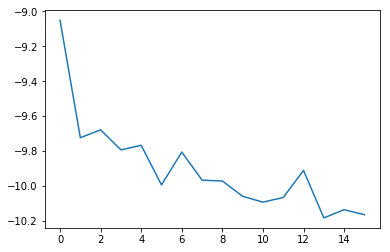

In [329]:
plt.plot(c_scores)
plt.show()

# Topic Modelling for Microsoft

In [330]:
data=df[df['Topic']=='microsoft']

In [331]:
docs=data['Title'].fillna('').str.lower()
docs=docs.str.replace('[^a-z ]','')
docs.head()

5     intellitec solutions to host th annual spring ...
9              microsofts new windows  ad targets apple
10    microsoft project centennial seen with univers...
11    microsoft sneaks onto android while android sn...
14     hololens dev edition costs  with new conker game
Name: Title, dtype: object

In [332]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(['use','','will','one','good'])
stemmer=nltk.stem.PorterStemmer()

docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean= [stemmer.stem(word) for word in words if word not in stopwords]
    words_clean=[word for word in words_clean if word not in stopwords]
    docs_clean.append(words_clean)

In [333]:
dictionary = gensim.corpora.Dictionary(docs_clean) # to get the id for every single word

In [334]:
# bag of words
docs_bow=[]
for doc in docs_clean:
    bow=dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [335]:
lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=4,random_state=100)

In [336]:
new_df=pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topics','probs'])
new_df.sort_values(by='probs').iloc[-1]['topics']

3.0

In [337]:
topics=[]
for doc in docs_bow:
    new_df=pd.DataFrame(lda_model.get_document_topics(doc),columns=['topics','probs'])
    topic=new_df.sort_values(by='probs').iloc[-1]['topics']
    topics.append(topic)
#data['topics']=topics

In [338]:
lda_model.print_topics()

[(0,
  '0.139*"microsoft" + 0.030*"window" + 0.019*"new" + 0.012*"app" + 0.012*"updat" + 0.008*"mobil" + 0.008*"build" + 0.008*"offic" + 0.008*"lumia" + 0.007*"cloud"'),
 (1,
  '0.137*"microsoft" + 0.024*"surfac" + 0.012*"pro" + 0.009*"window" + 0.007*"hololen" + 0.006*"appl" + 0.006*"app" + 0.006*"launch" + 0.005*"power" + 0.005*"secur"'),
 (2,
  '0.138*"microsoft" + 0.019*"xbox" + 0.014*"window" + 0.011*"linkedin" + 0.009*"cloud" + 0.008*"game" + 0.007*"new" + 0.006*"make" + 0.005*"buy" + 0.005*"band"'),
 (3,
  '0.108*"microsoft" + 0.016*"window" + 0.012*"offic" + 0.010*"new" + 0.009*"googl" + 0.008*"appl" + 0.007*"user" + 0.006*"updat" + 0.006*"busi" + 0.005*"us"')]

In [339]:
# coherence
from gensim.models.coherencemodel import CoherenceModel

In [340]:

c_scores=[]
for i in range(4,20):
    lda_model=gensim.models.LdaMulticore(docs_bow,id2word=dictionary,num_topics=i,random_state=100,iterations=300)
    coher_model=CoherenceModel(lda_model,corpus=docs_bow,coherence='u_mass')
    score=coher_model.get_coherence()
    c_scores.append(score)

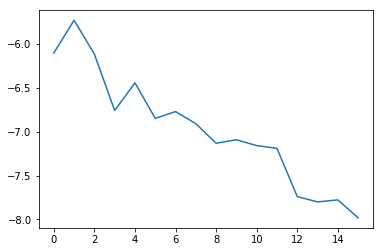

In [341]:
plt.plot(c_scores)
plt.show()